In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [64]:
sm = "ngc188.massSamples"
mem = "ngc188.membership"
ph = "../ngc188.phot"

In [92]:
phot = pd.read_csv(ph, sep='\s+')
phot['m1Mean'] = -1
phot['m1Std'] = -1
phot['m2Mean'] = -1
phot['m2Std'] = -1
phot['qMean'] = -1
phot['qStd'] = -1
phot['memMean'] = -1
phot['memStd'] = -1
phot['member'] = False
phot['binary'] = False
phot


,newID,g_ps,r_ps,i_ps,z_ps,y_ps,sigg_ps,sigr_ps,sigi_ps,sigz_ps,...,m1Mean,m1Std,m2Mean,m2Std,qMean,qStd,memMean,memStd,member,binary
0,631808,20.8282,19.7478,19.2297,18.9559,18.8162,0.0410,0.0283,0.0129,0.0100,...,-1,-1,-1,-1,-1,-1,-1,-1,False,False
1,575616,18.9484,18.2591,17.9402,17.8220,17.7285,0.0162,0.0340,0.0121,0.0100,...,-1,-1,-1,-1,-1,-1,-1,-1,False,False
2,729280,20.2805,19.8139,19.6564,19.6001,19.5753,0.0337,0.0297,0.0173,0.0322,...,-1,-1,-1,-1,-1,-1,-1,-1,False,False
3,751168,19.5361,18.7177,18.3783,18.2420,18.1174,0.0213,0.0167,0.0148,0.0159,...,-1,-1,-1,-1,-1,-1,-1,-1,False,False
4,340480,17.7630,17.1863,16.9173,16.8441,16.7446,0.0100,0.0100,0.0100,0.0100,...,-1,-1,-1,-1,-1,-1,-1,-1,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1925,109888,20.9272,19.8186,19.1981,18.8825,18.5480,0.0459,0.0177,0.0121,0.0100,...,-1,-1,-1,-1,-1,-1,-1,-1,False,False
1926,196736,20.5467,19.3537,18.7591,18.4669,18.3661,0.0231,0.0141,0.0100,0.0184,...,-1,-1,-1,-1,-1,-1,-1,-1,False,False
1927,657984,21.5786,20.4241,19.1375,18.5380,18.2413,0.1603,0.0328,0.0152,0.0134,...,-1,-1,-1,-1,-1,-1,-1,-1,False,False
1928,798656,19.7973,18.9421,18.5420,18.3566,18.2060,0.0360,0.0100,0.0100,0.0144,...,-1,-1,-1,-1,-1,-1,-1,-1,False,False


In [58]:
# should we exclude all the rows with negative sig values?
# no, we should probably include them since they are in the cluster
#
# phot = phot.loc[(phot['sigg_ps'] > 0) & (phot['sigr_ps'] > 0) & (phot['sigi_ps'] > 0) \
#                 & (phot['sigz_ps'] > 0) & (phot['sigy_ps'] > 0)]
# phot

In [59]:
# get the names for the masses
massesNames = np.loadtxt(sm,max_rows = 1, dtype=str)
massesNames = np.char.replace(massesNames,'mass','')
massesNames = np.char.replace(massesNames,'ratio','')
massesNames

array(['631808', '631808', '575616', ..., '034496', '034496', ''],
      dtype='<U6')

In [60]:
# get the masses
masses = np.loadtxt(sm,skiprows=1)
print(masses.shape)
print(masses.shape[1]/2.)

(1084, 3638)
1819.0


In [65]:
# get the memberships 
membership = np.loadtxt(mem)
print(membership.shape)

(1084, 1819)


In [106]:
#calculate the binary fraction
nBinary = 0
nCluster = 0
for i in range(0,masses.shape[1],2):
    # get the row in the phot file
    iden = int(massesNames[i])
    row = phot.loc[(phot['newID'] == iden)]
    #print(row['newID'])
    
    # get the column in the membership file
    imem = int(i/2)
    memArr = membership[:,imem]
    memMean = np.mean(memArr)
    memStd = np.std(memArr)
    
    # add to the phot df
    phot.at[row.index[0], 'memMean'] = memMean
    phot.at[row.index[0], 'memStd'] = memStd
    
    if (memMean - 3*memStd > 0):
        phot.at[row.index[0], 'member'] = True

        nCluster += 1
        
        # get the masses
        m1Arr = masses[:,i]
        qArr = masses[:,(i + 1)]
        m2Arr = m1Arr*qArr
        m2Mean = np.mean(m2Arr)
        m2Std = np.std(m2Arr)
        qMean = np.mean(qArr)
        qStd = np.std(qArr)
        
        # add to the phot df masses (to do)
        phot.at[row.index[0], 'qMean'] = qMean
        phot.at[row.index[0], 'qStd'] = qStd
    
        if (m2Mean - 3*m2Std > 0):
            nBinary += 1
            phot.at[row.index[0], 'binary'] = True

            
    #print(m1Arr)   
print(nBinary, nCluster, nBinary/nCluster, np.sqrt(nBinary)/nCluster)

512 1336 0.38323353293413176 0.016936689369737665


In [100]:
phot

,newID,g_ps,r_ps,i_ps,z_ps,y_ps,sigg_ps,sigr_ps,sigi_ps,sigz_ps,...,m1Mean,m1Std,m2Mean,m2Std,qMean,qStd,memMean,memStd,member,binary
0,631808,20.8282,19.7478,19.2297,18.9559,18.8162,0.0410,0.0283,0.0129,0.0100,...,-1,-1,-1,-1,-1.000000,-1.000000,0.000000,0.000000,False,False
1,575616,18.9484,18.2591,17.9402,17.8220,17.7285,0.0162,0.0340,0.0121,0.0100,...,-1,-1,-1,-1,-1.000000,-1.000000,0.000000,0.000000,False,False
2,729280,20.2805,19.8139,19.6564,19.6001,19.5753,0.0337,0.0297,0.0173,0.0322,...,-1,-1,-1,-1,-1.000000,-1.000000,0.000000,0.000000,False,False
3,751168,19.5361,18.7177,18.3783,18.2420,18.1174,0.0213,0.0167,0.0148,0.0159,...,-1,-1,-1,-1,-1.000000,-1.000000,0.000000,0.000000,False,False
4,340480,17.7630,17.1863,16.9173,16.8441,16.7446,0.0100,0.0100,0.0100,0.0100,...,-1,-1,-1,-1,-1.000000,-1.000000,0.464759,0.205902,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1925,109888,20.9272,19.8186,19.1981,18.8825,18.5480,0.0459,0.0177,0.0121,0.0100,...,-1,-1,-1,-1,-1.000000,-1.000000,0.000000,0.000000,False,False
1926,196736,20.5467,19.3537,18.7591,18.4669,18.3661,0.0231,0.0141,0.0100,0.0184,...,-1,-1,-1,-1,0.075813,0.049112,0.980347,0.137882,True,False
1927,657984,21.5786,20.4241,19.1375,18.5380,18.2413,0.1603,0.0328,0.0152,0.0134,...,-1,-1,-1,-1,-1.000000,-1.000000,0.006438,0.077834,False,False
1928,798656,19.7973,18.9421,18.5420,18.3566,18.2060,0.0360,0.0100,0.0100,0.0144,...,-1,-1,-1,-1,-1.000000,-1.000000,0.000000,0.000000,False,False


(22.0, 13.0)

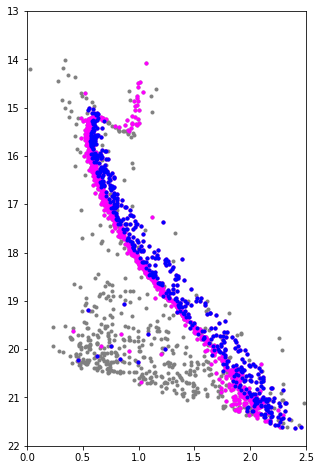

In [98]:
f, ax = plt.subplots(figsize=(5,8))
photMems = phot.loc[phot['member']]
photBinary = phot.loc[phot['binary']]
ax.plot(phot['g_ps'] - phot['i_ps'], phot['g_ps'],'.', color='gray')
ax.plot(photMems['g_ps'] - photMems['i_ps'], photMems['g_ps'],'.', color='magenta')
ax.plot(photBinary['g_ps'] - photBinary['i_ps'], photBinary['g_ps'],'.', color='blue')
ax.set_xlim(0, 2.5)
ax.set_ylim(22, 13)

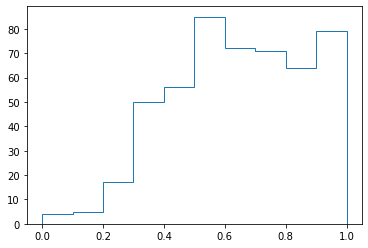

In [104]:
f, ax = plt.subplots()
photBinary = phot.loc[phot['binary']]
_ = ax.hist(photBinary['qMean'], histtype='step', bins=10, range=[0,1])